In [1]:
from __future__ import print_function
import numpy as np
import json
import csv

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse.linalg import svds
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE

In [2]:
documents = []
with open("data.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        documents.append(row[1])
print (documents[:3])

['title', 'TIL After Col. Shaw died in battle, Confederates buried him in a mass grave as an insult for leading black soldiers. Union troops tried to recover his body, but his father sent a letter saying "We would not have his body removed from where it lies surrounded by his brave and devoted soldiers."', 'TIL that in 1916 there was a proposed Amendment to the US Constitution that would put all acts of war to a national vote, and anyone voting yes would have to register as a volunteer for service in the United States Army.']


In [3]:
vectorizer = TfidfVectorizer(stop_words = 'english')
my_matrix = vectorizer.fit_transform([x for x in documents]).transpose()

In [4]:
print(type(my_matrix))
print(my_matrix.shape)

<class 'scipy.sparse.csc.csc_matrix'>
(12217, 3016)


In [5]:
u, s, v_trans = svds(my_matrix, k=100)
print(u.shape)
print(s.shape)
print(v_trans.shape)

(12217, 100)
(100,)
(100, 3016)


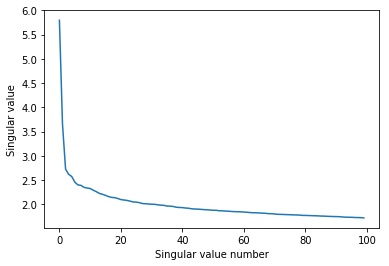

In [6]:
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

In [7]:
words_compressed, _, docs_compressed = svds(my_matrix, k=40)
docs_compressed = docs_compressed.transpose()
print(words_compressed.shape)
print(docs_compressed.shape)

(12217, 40)
(3016, 40)


In [8]:
word_to_index = vectorizer.vocabulary_
index_to_word = {i:t for t,i in word_to_index.items()}
print(words_compressed.shape)

(12217, 40)


In [9]:
#row normalize
words_compressed = normalize(words_compressed, axis = 1)

In [10]:
def closest_words(word_in, k = 10):
    if word_in not in word_to_index: return "Not in vocab."
    sims = words_compressed.dot(words_compressed[word_to_index[word_in],:])
    asort = np.argsort(-sims)[:k+1]
    return [(index_to_word[i],sims[i]/sims[asort[0]]) for i in asort[1:]]

In [11]:
closest_words("technology")

[('worry', 0.8633819570978184),
 ('racket', 0.8633819570978184),
 ('kitties', 0.8633819570978184),
 ('absorbable', 0.8633819570978184),
 ('catgut', 0.8633819570978184),
 ('violins', 0.8633819570978184),
 ('stitches', 0.8633819570978184),
 ('violin', 0.8633819570978184),
 ('swe', 0.862945014590262),
 ('wc', 0.862945014590262)]

In [12]:
tsne = TSNE(verbose=1)

In [13]:
print(docs_compressed.shape)
#we'll just take the first 5K documents, because TSNE is memory intensive!
subset = docs_compressed[:5000,:]
projected_docs = tsne.fit_transform(subset)
print(projected_docs.shape)

(3016, 40)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3016 samples in 0.008s...
[t-SNE] Computed neighbors for 3016 samples in 0.817s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3016
[t-SNE] Computed conditional probabilities for sample 2000 / 3016
[t-SNE] Computed conditional probabilities for sample 3000 / 3016
[t-SNE] Computed conditional probabilities for sample 3016 / 3016
[t-SNE] Mean sigma: 0.019698
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.467384
[t-SNE] KL divergence after 1000 iterations: 1.425595
(3016, 2)


In [14]:
docs_compressed = normalize(docs_compressed, axis = 1)
def closest_projects(word, k = 5):
    sims = docs_compressed.dot(words_compressed[word_to_index[word],:])
    asort = np.argsort(-sims)[:k+1]
    return [(documents[i],sims[i]/sims[asort[0]]) for i in asort[1:]]

In [15]:
for title, score in closest_projects("computer"):
    print("{}:{:.3f}".format(title, score))
    print ("\n")
print()

TIL Blind people are able to 'read' text output on a computer using a refreshable braille display.:0.925


TIL Robert De Niro prepared for his role in 'Taxi Driver' by obtaining a New York taxi license and spending a month working up to 14 hour shifts picking people up all over New York.:0.913


Fun Fact: No more than 40 people live 800 feet (243 m) above the ground of New York City. It's an exclusive privilege for the super rich.:0.842


TIL 19% of people believe that polygamy is morally acceptable in the U.S:0.808


TIL subway escalators can transport about 30% more people if everybody stands, rather than having a standing lane and a walking lane.:0.802



